<a href="https://colab.research.google.com/github/KaitlinBustos/bwm-2025-q2-project-example/blob/main/Mental_Health_Stigma_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files


In [2]:
uploaded = files.upload()

Saving survey.csv to survey.csv


In [3]:
# Replace 'your_file.csv' with the actual filename after uploading
df = pd.read_csv('survey.csv')


In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
# See shape of data
df.shape

(1259, 27)

In [6]:
# view columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
# Check for missing values
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [8]:
# Filter for those who are not self employed
df = df[df['self_employed'] == 'No']

In [9]:
# Chose relevant columns for analysis

df = df.drop(columns=['Timestamp','state', 'self_employed','comments','mental_health_interview','phys_health_interview','work_interfere','phys_health_consequence'])

In [10]:
df.head()

,Age,Gender,Country,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
20,29,Male,United States,Yes,Yes,100-500,No,Yes,Yes,Yes,No,No,No,Somewhat difficult,Maybe,Some of them,Some of them,No,No
22,46,Male,United States,No,Yes,26-100,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,Some of them,Yes,No,No
23,41,Male,United States,No,Yes,More than 1000,No,No,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,No,Don't know,No
24,33,male,United States,Yes,Yes,26-100,No,Yes,Yes,Not sure,Don't know,Yes,Yes,Don't know,No,Yes,Yes,Don't know,No
25,35,male,United States,Yes,Yes,More than 1000,No,No,Yes,Yes,No,Don't know,No,Very easy,Yes,Some of them,Yes,No,No


In [11]:
df.shape

(1095, 19)

In [12]:
for col in df.columns:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print()


--- Age ---
Age
 29      78
 32      70
 27      66
 28      66
 26      64
 34      58
 25      58
 33      56
 31      54
 30      51
 35      48
 23      47
 24      41
 37      37
 38      36
 39      29
 40      28
 36      27
 43      23
 41      19
 22      17
 42      16
 21      15
 45      11
 46      11
 19       8
 44       8
 18       7
 48       6
 20       6
 50       4
 51       4
 56       3
 49       3
 55       3
 57       3
 47       2
 60       2
 54       2
-29       1
 329      1
 58       1
 62       1
-1726     1
 5        1
 53       1
 72       1
Name: count, dtype: int64

--- Gender ---
Gender
Male                                              538
male                                              169
Female                                            111
M                                                 105
female                                             53
F                                                  35
m                                              

In [13]:
#clean gender column

# Create a function to clean gender values
def clean_gender(value):
    value = str(value).strip().lower()

    # Standardize male entries
    if value in ['male', 'm', 'make', 'man', 'cis male', 'male (cis)', 'msle', 'maile', 'malr', 'mail', 'guy (-ish) ^_^']:
        return 'Male'

    # Standardize female entries
    elif value in ['female', 'f', 'woman', 'femake', 'female (cis)','female (trans)', 'femail', 'trans-female', 'trans woman']:
        return 'Female'

    # Standardize unclear/other entries
    else:
        return 'Other'

# Apply to your DataFrame
df['gender_cleaned'] = df['Gender'].apply(clean_gender)

# Optional: see value counts
df['gender_cleaned'].value_counts()

# Drop messy gender column
df = df.drop(columns=['Gender'])

In [14]:
#    Get rid of countries with less than 10 respondants

# Count responses per country
country_counts = df['Country'].value_counts()

# Keep only countries with at least 10 respondents
valid_countries = country_counts[country_counts >= 10].index

# Filter the DataFrame
df = df[df['Country'].isin(valid_countries)].copy()



In [15]:
# Check

df['Country'].value_counts()

,count
Country,
United States,684
United Kingdom,155
Canada,57
Germany,33
Ireland,21
Netherlands,20
Australia,19
France,11


In [16]:
# Clean age

# Drop rows with invalid or missing age
df = df[(df['Age'] >= 18) & (df['Age'] <= 72)].copy()

# Define age bins and labels
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 100]  # last bin covers 55+
age_labels = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '55+']

# Create a new binned column
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Drop messy age column
df = df.drop(columns=['Age'])

In [17]:
# Check

df['age_group'].value_counts()

,count
age_group,
26-30,290
31-35,264
36-40,168
18-25,126
41-45,92
46-50,33
55+,14
51-55,9


In [18]:
# Choose your target column
target_col = 'mental_health_consequence'

# Store results in a dictionary
crosstabs = {}

# Loop through all columns except the target
for col in df.columns:
    if col != target_col:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Create normalized crosstab
            ct = pd.crosstab(df[col], df[target_col], normalize='index')
            crosstabs[col] = ct

# Now display them (or view one by one)
for col, table in crosstabs.items():
    print(f"\n--- {col} vs {target_col} ---")
    print(table)



--- Country vs mental_health_consequence ---
mental_health_consequence     Maybe        No       Yes
Country                                                
Australia                  0.105263  0.526316  0.368421
Canada                     0.368421  0.403509  0.228070
France                     0.636364  0.272727  0.090909
Germany                    0.303030  0.606061  0.090909
Ireland                    0.428571  0.190476  0.380952
Netherlands                0.400000  0.450000  0.150000
United Kingdom             0.396104  0.370130  0.233766
United States              0.408223  0.356828  0.234949

--- family_history vs mental_health_consequence ---
mental_health_consequence     Maybe        No       Yes
family_history                                         
No                         0.387205  0.410774  0.202020
Yes                        0.412935  0.310945  0.276119

--- treatment vs mental_health_consequence ---
mental_health_consequence     Maybe        No       Yes
treatment    

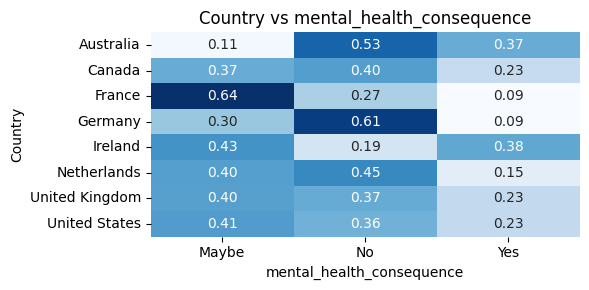

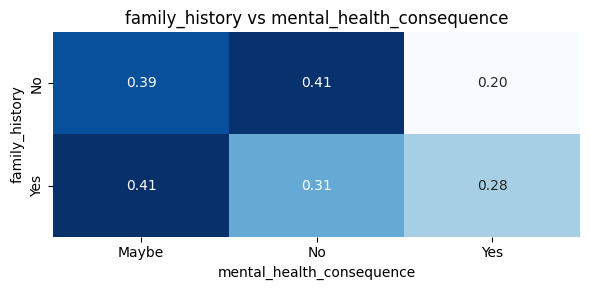

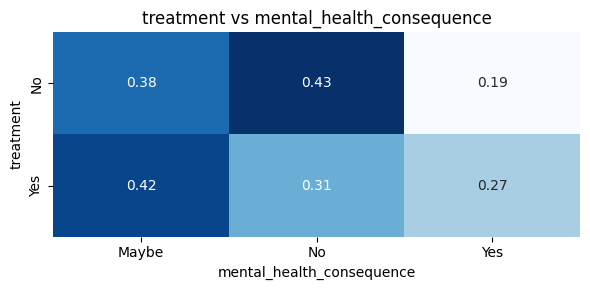

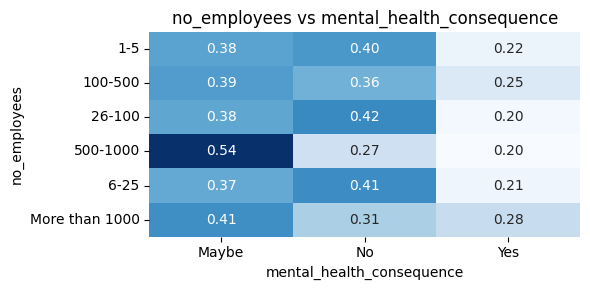

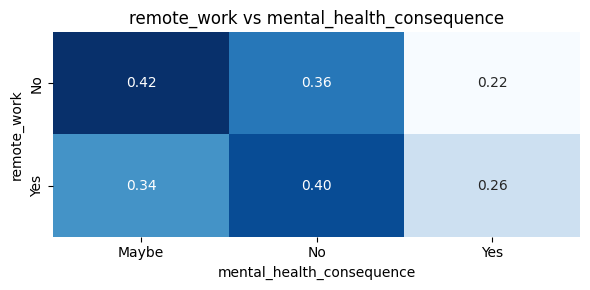

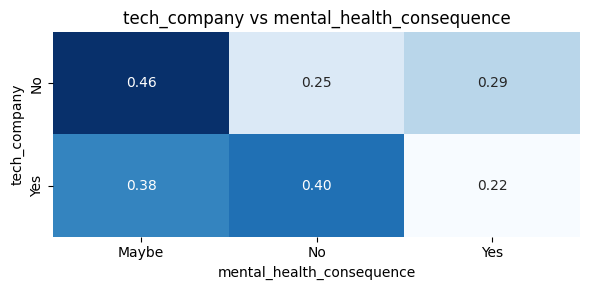

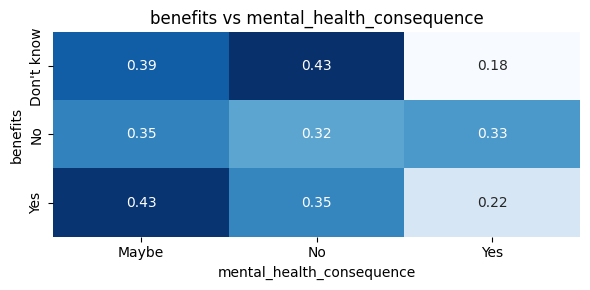

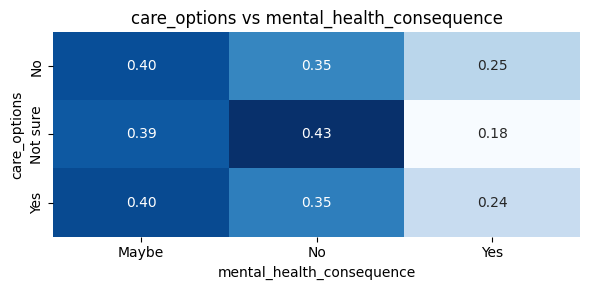

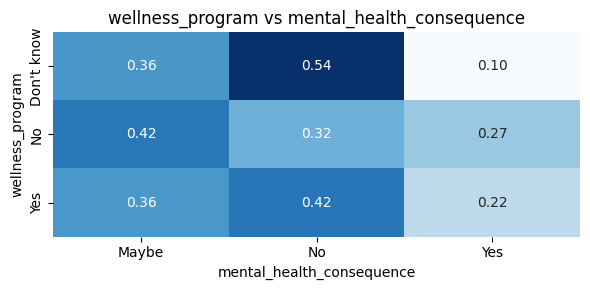

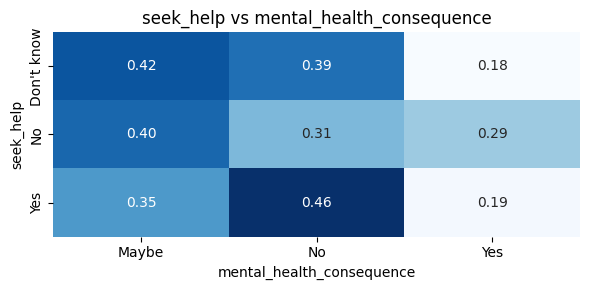

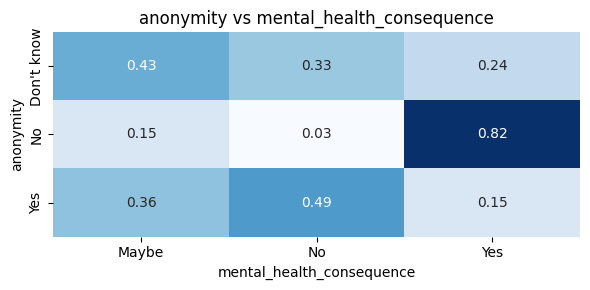

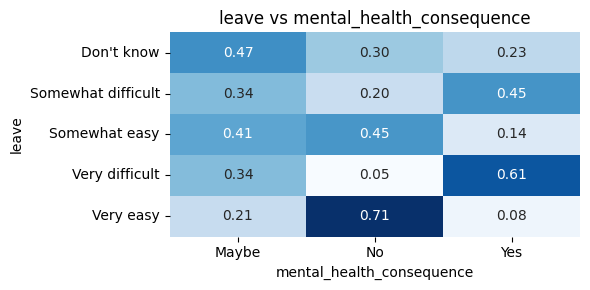

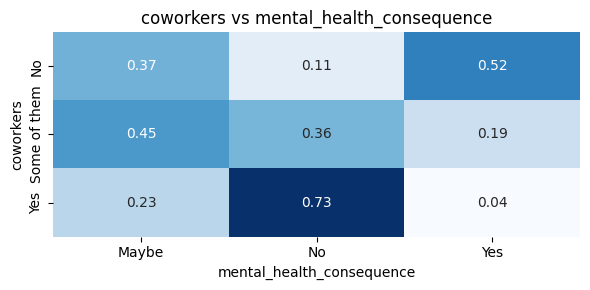

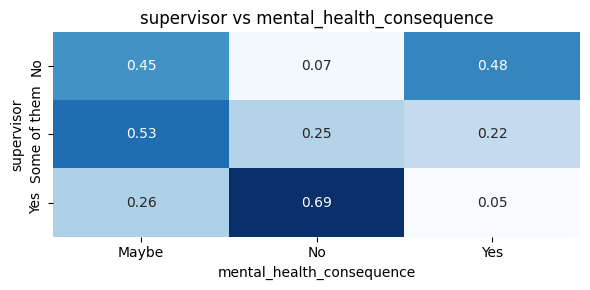

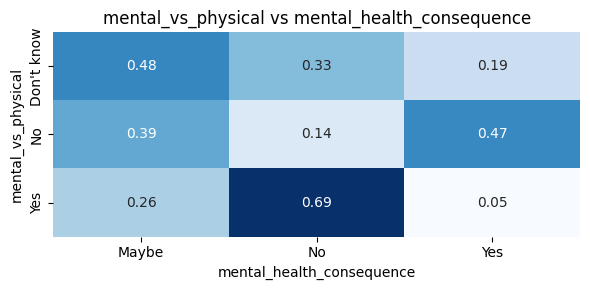

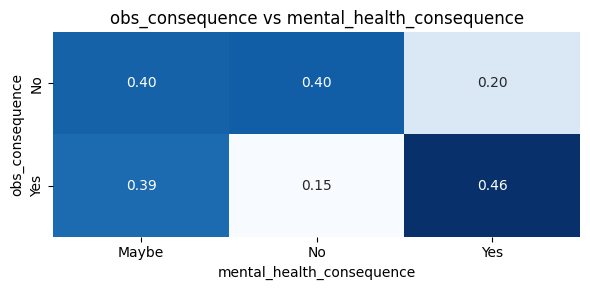

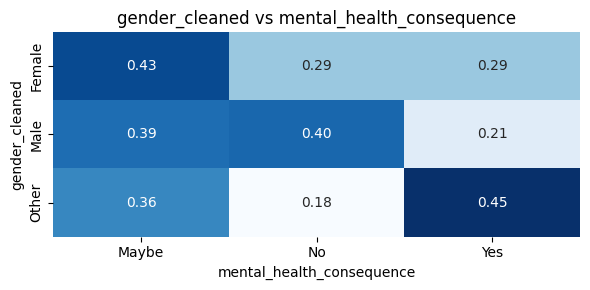

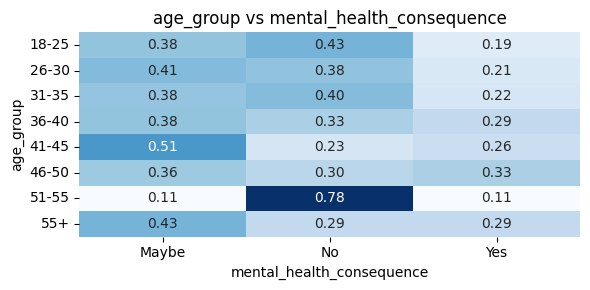

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

for col, table in crosstabs.items():
    plt.figure(figsize=(6, 3))
    sns.heatmap(table, annot=True, cmap='Blues', cbar=False, fmt=".2f")
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

target_col = 'mental_health_consequence'
results = []

for col in df.columns:
    if col == target_col:
        continue
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Drop missing values just in case
        contingency = pd.crosstab(df[col], df[target_col])
        if contingency.shape[0] < 2 or contingency.shape[1] < 2:
            continue  # skip uninformative columns
        try:
            chi2, p, dof, expected = chi2_contingency(contingency)
            results.append({
                'feature': col,
                'chi2': chi2,
                'p_value': p,
                'significant': p < 0.05
            })
        except ValueError:
            continue  # skip problematic inputs

# Convert to DataFrame
chi2_results = pd.DataFrame(results)

# Sort by significance
chi2_results = chi2_results.sort_values(by='p_value')

yes_flags = []

for col in chi2_results['feature']:
    crosstab = pd.crosstab(df[col], df[target_col], normalize='index')
    if 'Yes' in crosstab.columns:
        if any(crosstab['Yes'] > 0.5):
            yes_flags.append(True)
        else:
            yes_flags.append(False)
    else:
        yes_flags.append(False)

chi2_results['any_category_yes>50%'] = yes_flags

print(chi2_results)


               feature        chi2       p_value  significant  \
13          supervisor  370.114635  7.948312e-79         True   
14  mental_vs_physical  232.805847  3.284971e-49         True   
12           coworkers  217.078797  7.970923e-46         True   
11               leave  182.627479  2.889007e-35         True   
10           anonymity   89.393290  1.771650e-18         True   
15     obs_consequence   52.585546  3.812359e-12         True   
8     wellness_program   35.599627  3.497781e-07         True   
2            treatment   19.014038  7.432830e-05         True   
9            seek_help   23.480323  1.015050e-04         True   
6             benefits   21.133326  2.979646e-04         True   
5         tech_company   15.006519  5.512845e-04         True   
1       family_history   12.524135  1.907299e-03         True   
16      gender_cleaned   13.313511  9.841303e-03         True   
17           age_group   24.084589  4.475592e-02         True   
0              Country   

In [21]:
# See shape of data
df.shape

(996, 19)

In [22]:
def encode_df(df):
    import pandas as pd
    import numpy as np

    # Ordinal encoding
    ordinal_maps = {
        'no_employees': {
            '1-5': 0,
            '6-25': 1,
            '26-100': 2,
            '100-500': 3,
            '500-1000': 4,
            'More than 1000': 5
        },
        'mental_health_consequence': {
            'No': 0,
            'Yes': 1,
            'Maybe': 2
        },
        'leave': {
            'Very easy': 0,
            'Somewhat easy': 1,
            "Don't know": 2,
            'Somewhat difficult': 3,
            'Very difficult': 4
        },
        'coworkers': {
            'No': 0,
            'Some of them': 1,
            'Yes': 2
        },
        'supervisor': {
            'No': 0,
            'Some of them': 1,
            'Yes': 2
        },
        'age_group': {
            '18-25': 0,
            '26-30': 1,
            '31-35': 2,
            '36-40': 3,
            '41-45': 4,
            '46-50': 5,
            '51-55': 6,
            '55+': 7
        }
    }
    for col, mapping in ordinal_maps.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    # One-hot encode nominal categorical variables (including binary-style ones)
    nominal_cols = ['Country', 'family_history', 'benefits', 'care_options', 'wellness_program', 'seek_help',
                    'remote_work', 'tech_company', 'anonymity', 'mental_vs_physical', 'obs_consequence', 'gender_cleaned','treatment']
    for col in nominal_cols:
        if col in df.columns:
            df[col] = df[col].astype(str)
            df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=False)

    return df


In [23]:
df= encode_df(df)

In [24]:
# Filter out rows where target is 'Maybe'
df = df[df['mental_health_consequence'] != 2]  # Assuming 'Maybe' is encoded as 2


In [25]:
# change bool data type

# Convert only bool columns to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [26]:
df

,no_employees,leave,mental_health_consequence,coworkers,supervisor,age_group,Country_Australia,Country_Canada,Country_France,Country_Germany,...,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes,gender_cleaned_Female,gender_cleaned_Male,gender_cleaned_Other,treatment_No,treatment_Yes
24,2,2,0,2,2,2,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
25,5,0,1,1,2,3,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
27,1,2,0,2,2,3,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
28,2,3,0,1,0,2,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
29,1,4,1,1,0,3,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,3,2,1,1,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1254,2,1,0,1,1,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1255,2,3,0,1,2,2,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
1256,5,3,1,0,0,2,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [27]:
# Fit logistic regression model

# Set X and Y

X = df.drop('mental_health_consequence', axis=1)
y = df['mental_health_consequence']

# Test Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Fit and Train
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[66  8]
 [ 8 38]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        74
           1       0.83      0.83      0.83        46

    accuracy                           0.87       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



In [28]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))


                   Feature  Coefficient
3               supervisor    -1.856256
35   mental_vs_physical_No     1.183573
36  mental_vs_physical_Yes    -1.172198
2                coworkers    -0.998673
32            anonymity_No     0.976195
8          Country_Germany    -0.935878
33           anonymity_Yes    -0.882826
26           seek_help_Yes    -0.596393
23    wellness_program_Yes     0.581311
25            seek_help_No     0.553780


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create model
log_reg = LogisticRegression(max_iter=1000)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']  # works with 'l2'
}

# Create GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_log_reg = grid_search.best_estimator_

# Evaluate
print("Best Params:", grid_search.best_params_)
print("Best Score (CV accuracy):", grid_search.best_score_)
print("Test Accuracy:", best_log_reg.score(X_test, y_test))


Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score (CV accuracy): 0.8958333333333333
Test Accuracy: 0.8666666666666667


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Define and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# 3. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.85

Confusion Matrix:
 [[64 10]
 [ 8 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        74
           1       0.79      0.83      0.81        46

    accuracy                           0.85       120
   macro avg       0.84      0.85      0.84       120
weighted avg       0.85      0.85      0.85       120



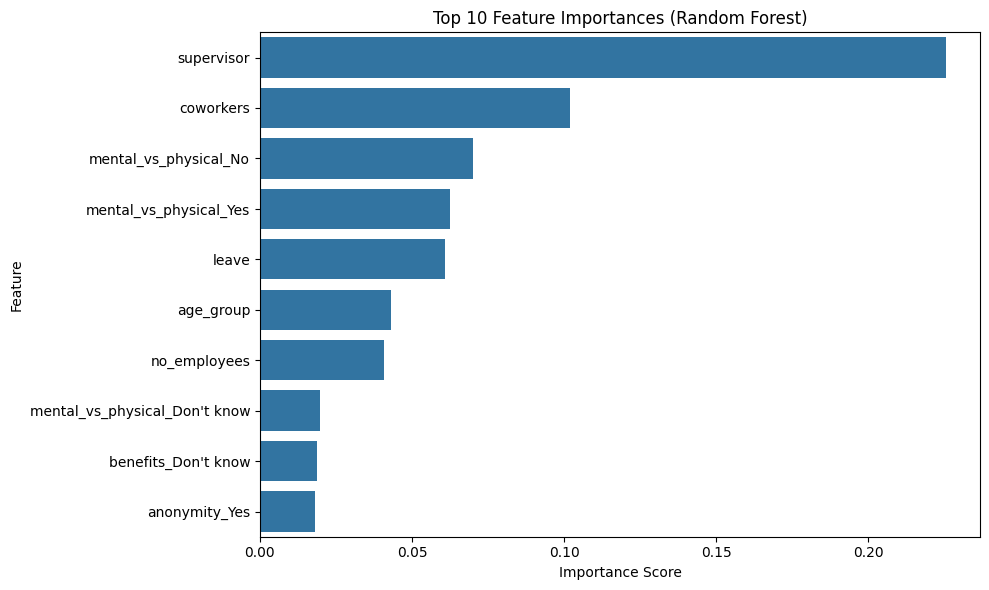

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Create pipeline with scaler + SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))

# 2. Fit model
svm_model.fit(X_train, y_train)

# 3. Predict
y_pred_svm = svm_model.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy: 0.875

Confusion Matrix:
 [[66  8]
 [ 7 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90        74
           1       0.83      0.85      0.84        46

    accuracy                           0.88       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.88      0.88      0.88       120



In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define model
svm_model = SVC()

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Try different kernels
}

# Grid Search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best results
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)
print("Test Score:", grid_search.score(X_test, y_test))


Best Params: {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best CV Score: 0.9041666666666666
Test Score: 0.8833333333333333


In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Use degree=2 to include interaction terms and squared terms
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression(max_iter=1000)
)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        74
           1       0.81      0.85      0.83        46

    accuracy                           0.87       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



In [33]:
# Get feature names after polynomial transformation
poly = pipeline.named_steps['polynomialfeatures']
feature_names = poly.get_feature_names_out(X.columns)


In [34]:
# Get the logistic regression step
log_reg = pipeline.named_steps['logisticregression']

# Combine feature names and coefficients
import pandas as pd

coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

coefficients.head(15)  # top 15 most influential features


,Feature,Coefficient
221,age_group Country_United Kingdom,0.885017
152,coworkers wellness_program_Yes,0.873062
56,no_employees Country_United States,0.736367
151,coworkers wellness_program_No,-0.701316
200,supervisor tech_company_Yes,-0.664778
689,care_options_No seek_help_Don't know,0.650639
227,age_group benefits_Yes,0.638155
205,supervisor mental_vs_physical_No,0.619286
248,age_group obs_consequence_Yes,0.618248
184,supervisor family_history_Yes,-0.616749


<ipython-input-35-ba24d1bd55db>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_interactions, x='Coefficient', y='Feature', palette='coolwarm')


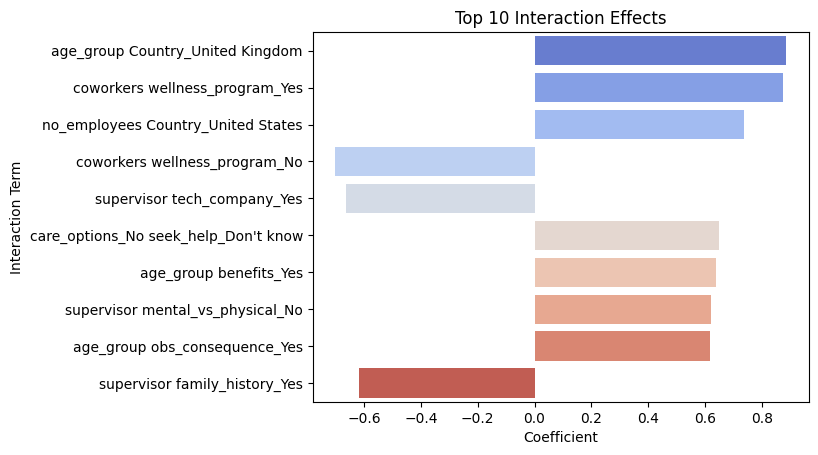

In [35]:
# Filter interaction terms only
interactions = coefficients[coefficients['Feature'].str.contains(' ')]  # space implies interaction
top_interactions = interactions.sort_values(by='Coefficient', key=abs, ascending=False).head(10)

sns.barplot(data=top_interactions, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Top 10 Interaction Effects')
plt.xlabel('Coefficient')
plt.ylabel('Interaction Term')
plt.show()
